In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start_time = time.time()

### Generating Data

In [3]:
# A simple function generating random predictors and responses!
def gen_data(start=2, end=100, step=2, add_noise=0):
    x = np.arange(start, end, step)
    y = 10 + 5*x
    
    if add_noise > 0:
        y = np.random.normal(y, add_noise)
        
    return x, y

### Cost Function - Vectorized

In [4]:
#The cost function J(theta0, theta1)
def cost_function(x, y, params):
    
    m = len(y)    
    
    #hypothesis h(x)
#   h_of_x = np.apply_along_axis(lambda x: (params[0] + params[1]*x), 0, x)
    h_of_x = x * params[1]
    h_of_x = h_of_x + params[0]
    
    #performing calculations
    res = h_of_x - y
    res = res**2
    sum_of_squared_errors = sum(res)
    
    #calculating cost
    cost = sum_of_squared_errors/(2*m) 
    
    return cost

### Function to calculate Sum of Errors (formula) - Vectorized

In [5]:
def calculate_sum_of_errors(x, y, params, with_xi = False):
    m = len(y)
    sum_of_errors = 0
    
    if with_xi:
        #hypothesis h(x)
#       h_of_x = np.apply_along_axis(lambda x: (params[0] + params[1]*x), 0, x)
        h_of_x = x * params[1]
        h_of_x = h_of_x + params[0]

        #performing calculations
        res = h_of_x - y
        res = res*x
        sum_of_errors = sum(res)

    else:
        #hypothesis h(x)
#       h_of_x = np.apply_along_axis(lambda x: (params[0] + params[1]*x), 0, x)
        h_of_x = x * params[1]
        h_of_x = h_of_x + params[0]
        
        #performing calculations
        res = h_of_x - y
        sum_of_errors = sum(res)
    
    return sum_of_errors

### Gradient Descent Function

In [6]:
#Gradient descent
def gradient_descent(x, y, params, alpha, precision=0.5 , iterations=0):
    
    m = len(y)
    cost_history = list()
    first_iteration = True
    iterations = 0
    
    while True:
        
        sum_of_errors = calculate_sum_of_errors(x, y, params)
        sum_of_errors_xi = calculate_sum_of_errors(x, y, params, with_xi=True)
        
        temp0 = params[0] - alpha * 1/m * sum_of_errors
        temp1 = params[1] - alpha * 1/m * sum_of_errors_xi
                
        if np.isinf(temp0) or np.isinf(temp1):
            break
        
        params[0] = temp0
        params[1] = temp1
    
        curr_cost = cost_function(x, y, params)
                
#         print("theta0 = {} | theta1 = {} | curr_cost = {}".format(params[0],params[1], curr_cost))
            
        if curr_cost < precision:
            break
        
        
        if not(first_iteration) and (cost_history[-1] - curr_cost <= precision):
            break
        
        if first_iteration:
            first_iteration = False
    
        cost_history.append(curr_cost)
    
        iterations += 1
        
    return params, cost_history, iterations

### Intitializing the data variables

In [7]:
x, y = gen_data(start=2, end=100, add_noise=30)

In [8]:
x

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [9]:
y

array([ 39.8076128 ,  25.45826392,  67.11695146,  67.32614045,
       101.76151492,  40.93381499,  75.22188477,  97.63871638,
       153.36423721, 133.33229092,  34.39743851, 144.12783924,
       134.7588057 , 143.20874582, 178.0896933 , 131.39185747,
       147.63430569, 231.86064235, 255.86403246, 212.80675238,
       221.54027762, 188.66531508, 214.89313952, 234.04808704,
       209.01621791, 302.25818031, 271.64101186, 319.71444118,
       274.96287075, 353.01960884, 307.90124213, 320.51888653,
       304.74283012, 339.18271257, 329.80094316, 407.11115206,
       436.97550607, 383.97719388, 394.71287827, 387.03622044,
       423.35017921, 417.38749609, 457.47696794, 428.34244516,
       480.29128509, 441.19796674, 454.5039216 , 538.63377982,
       490.2772564 ])

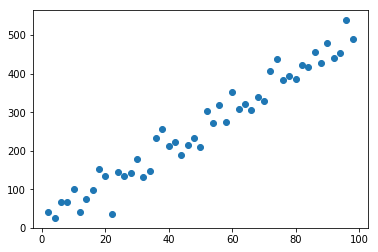

In [10]:
plt.scatter(x, y)

### Calculating cost on custom parameters

In [11]:
params = [1,1]
cost_function(x,y, params)

28437.82307173753

### Running the Gradient Descent

In [12]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)

In [13]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 14.817790034374601 | theta1 = 4.906616292282539


### Plotting the regression line on newly obtained parameters from Gradient Descent

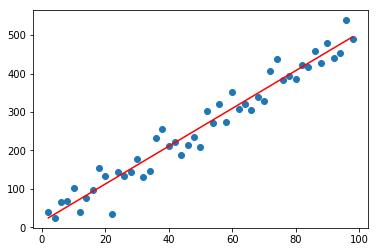

In [14]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

### Adding an outlier - high leverage point

In [15]:
x = np.concatenate((x,[80]))

In [16]:
y = np.concatenate((y,[-300]))

In [17]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)


In [18]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 1.0054217538341932 | theta1 = 0.865325271573421


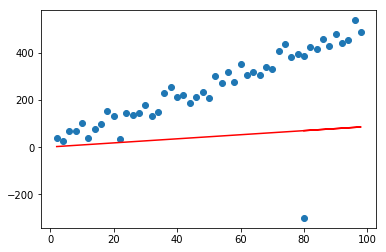

In [19]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

In [20]:
print("Total time taken by program: {} seconds ".format((time.time() - start_time)))

Total time taken by program: 3.832383155822754 seconds 
